## DATA PREPROCESSING AND ANALYSIS

#Steps to take:

1. Import the needed libraries.
2. Bring in the dataset to use, check and study the dataset, check for all the needed informations like the shapes, info, types, column etc.
3. Check for missing data, decide to leave the missing data and fill it with row with the most count, just a decision though i can remove it if its affecting analysis.
4. Convert column with time to datetime object and do feature egineering on time.
5. Check for unique variables in each column, determine the cardinality variable and rare catergory variables.
6. Check for outliers.
7. Do exploratory analysis by answering the questions.
8. Answering the question of 'do event happen equally at different times of the day or are there partterns of occurrence'?
9. Answer the second question 'analyse a particular account id for insight on how the person uses the service at different times of the day'?
10. Do further analysis to know more about what the dataset is point to and know more about the dataset.
11. Saving the dataset again in csv file because it has been worked on but with a modified name.

In [1]:
#Importing the needed initial libraries for data preparation
import pandas as pd #for data manipulation
import numpy as np  #for numeric computations
import matplotlib.pyplot as plt #for graphs
import seaborn as sns

In [2]:
#Loading the data set
data = pd.read_csv('actions2load.csv')
#conclusion: the data is about a subscription platform been engaged

In [3]:
#Checking for the first few rows of the data set and columns
data.head()

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [4]:
#Checking for the last few rows in the data set
data.tail()

,account_id,event_time,event_type,product_id,additional_data
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,-1,https://www.manning.com/books/bdd-in-action-se...
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,-1,https://www.manning.com/books/bdd-in-action-se...
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,-1,https://www.google.com/
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,-1,https://www.google.com/
3242075,3eff5d4b55889abb0a8b08d2136f1b63,2020-06-04 04:20:13.271,ReadingOwnedBook,733,1200s


In [5]:
#Checking for data size
data.shape

(3242076, 5)

In [6]:
#Checking for the data types and the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   account_id       object
 1   event_time       object
 2   event_type       object
 3   product_id       int64 
 4   additional_data  object
dtypes: int64(1), object(4)
memory usage: 123.7+ MB


In [7]:
#Loading data and checking for all the necessary information about the data set, all in one cell
data = pd.read_csv('actions2load.csv')
print("The Data set has {} Rows and {} Columns,".format(data.shape[0], data.shape[1]))
display(data.describe())
display(data.head())
display(data.dtypes.value_counts())

The Data set has 3242076 Rows and 5 Columns,


,product_id
count,3.242076e+06
mean,5.153777e+02
std,4.912778e+02
min,-1.000000e+00
25%,-1.000000e+00
50%,6.130000e+02
75%,9.710000e+02
max,1.838000e+03


,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


object    4
int64     1
dtype: int64

In [8]:
#Checking for how complete the whole dataset is
data.isnull().sum()
#conclusion: additional id is the only one with missing data

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64

In [9]:
#Quantifying the percentage of missing values in each variable:
data.isnull().mean()

account_id         0.000000
event_time         0.000000
event_type         0.000000
product_id         0.000000
additional_data    0.159195
dtype: float64

## I will be checking for the unique variables in each column to see their unique variables and be able to know much about the column

In [10]:
#Checking for the unique variable in account id variable
data['account_id'].unique()

array(['608aa5969cef2edc29cb0c46deaec9da',
       'd07263602248aa70ce1967d6f98f9506',
       'b7d5902d66127909d0f9d766a841ebb5', ...,
       '861f5d79a9348e0ceaf2a5531b2dd92e',
       '75713c220d80f391f2e2360cefec11df',
       '65671ae265025ff94d1b72899f7dece7'], dtype=object)

In [11]:
#Checking for the unique variable in event time variable
data['event_time'].unique()

array(['2019-11-29 12:10:08.154', '2019-11-29 12:10:19.962',
       '2019-11-29 12:11:20.707', ..., '2020-06-04 04:19:59.613',
       '2020-06-04 04:19:59.612', '2020-06-04 04:20:13.271'], dtype=object)

In [12]:
#Checking for the unique variable in event type variable
data['event_type'].unique()

array(['DashboardLivebookLinkOpened', 'ReadingOwnedBook',
       'ProductTocLivebookLinkOpened', 'ReadingOpenChapter',
       'HighlightCreated', 'BookmarkCreated', 'ReadingFreePreview',
       'ProductLookInsideLivebookLinkOpened', 'SearchResultOpened',
       'SearchMade', 'ProductLiveaudioUpsell', 'WishlistItemAdded',
       'OrderConfirmationLivebookLinkOpened', 'CrossReferenceTermOpened',
       'ExerciseSolved', 'UpvoteGiven', 'ShareableLinkOpened',
       'ShareableLinkCreated', 'NoteCreated', 'ProductSeeFreeLinkOpened',
       'LivebookLogin', 'EBookDownloaded', 'EBookRegistration',
       'FreeContentCheckout', 'UnknownOriginLivebookLinkOpened',
       'AddProductOffering', 'RemoveProductOffering', 'AddOrUpdateCoupon',
       'GoToManningShoppingCart', 'FirstManningAccess',
       'FirstLivebookAccess', 'LivebookRegistration',
       'LivebookAccountConfirmation', 'SherlockHolmesClueFound',
       'CommentCreated'], dtype=object)

In [13]:
#Checking for the unique variable in product id variable
data['product_id'].unique()

array([1156,  610, 1172, 1066, 1073,  887, 1045,  717,  844, 1085, 1003,
       1094,  869, 1130, 1190,  775, 1276, 1178,  689,  826, 1090,  981,
        759, 1251,  691,  882, 1049,  888,  803,  855, 1016,  864, 1069,
        728,  994,  548,  786, 1194,   -1,  346,  267, 1024,  894, 1036,
       1202,  568, 1054,  681,  972,  276,  258,  880, 1280,  816, 1079,
        982,  899,  297, 1006,  293, 1234,  674,  471, 1191,  813,  970,
        983, 1108, 1082, 1218,  901, 1176, 1096,  862,  870,  733,  938,
        789,  712, 1057, 1196,  800, 1185,  902,  912, 1070,  174,  997,
        708,  876, 1050,  612, 1080, 1097,  318, 1100,  565,  496,  811,
       1114, 1214,  920, 1141, 1188,  919, 1093, 1105,  818,  948,  702,
        976,  164,  668,  465, 1048,  879, 1249,  995,  676,   22,  926,
        830,  900, 1134, 1208, 1113,  835, 1137,  257,  825, 1009,   43,
        300,  904,  873, 1092,  705, 1183,  485,  757,  933, 1089,  939,
        586,   64,  649, 1083,  400,  308, 1165, 10

In [14]:
#Checking for the unique variable in additional data variable
data['additional_data'].unique()

array(['/book/learn-dbatools-in-a-month-of-lunches', '60s', '480s', ...,
       '400461', '400462',
       'https://www.manning.com/books/bdd-in-action-second-edition?query=Bdd%20in'],
      dtype=object)

In [15]:
#Filling missing data in additional data
# I will be checking to know the value with the most count
#I will use the value with the most count to fill up the NAN rows in the column
data['additional_data'].value_counts()
#conclusion: https://www.google.com/ has the highest value counts
#and will be use to fill the NAN column

https://www.google.com/    676366
60s                        215130
120s                       181225
240s                       150269
480s                       110059
                            ...  
347429                          1
347430                          1
347431                          1
347432                          1
346132                          1
Name: additional_data, Length: 248390, dtype: int64

In [16]:
#Replacing the NAN values with the highest value count 
#because is the most common value in the additional data column
data = data.fillna({'additional_data': 'https://www.google.com/'})
#conclusion: though the column is not needed in the analysis but i dont want to drop any column

In [17]:
#Calling data to check what i have done in the data set
data.head()

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [18]:
#Checking again to see if there are missing data or not with fillna that i have done
data.isnull().sum()
#conclusion: no missing value again and all column still complete

account_id         0
event_time         0
event_type         0
product_id         0
additional_data    0
dtype: int64

In [19]:
#Changing the event time to data type to dattime
data['event_time'] = pd.to_datetime(data['event_time'])

In [20]:
#Checking the data type to see if the event time has been changed
data.info()
#conclusion: correctly changed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 5 columns):
 #   Column           Dtype         
---  ------           -----         
 0   account_id       object        
 1   event_time       datetime64[ns]
 2   event_type       object        
 3   product_id       int64         
 4   additional_data  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 123.7+ MB


In [21]:
#Spliting event time column into day, month, year, hour and minute
data['event_day'] = data['event_time'].dt.day
data['event_month'] = data['event_time'].dt.month
data['event_year'] = data['event_time'].dt.year
data['event_hour'] = data['event_time'].dt.hour
data['event_minute'] = data['event_time'].dt.minute

In [22]:
data.head()
#new columns of day, month, year, hour and minute created after splitting

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,10
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,10
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,11
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,29,11,2019,12,11
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,11


In [23]:
#Checking the data types again
data.info()
#conclusion: new created colums now in int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   account_id       object        
 1   event_time       datetime64[ns]
 2   event_type       object        
 3   product_id       int64         
 4   additional_data  object        
 5   event_day        int64         
 6   event_month      int64         
 7   event_year       int64         
 8   event_hour       int64         
 9   event_minute     int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 247.4+ MB


In [24]:
#Change the new created hour and minute to datetime
data['event_hour'] = pd.to_datetime(data['event_hour'])
data['event_minute'] = pd.to_datetime(data['event_minute'])

In [25]:
#Checking the info again for proper assurance it has change
data.info()
#conclusion: succesfully changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   account_id       object        
 1   event_time       datetime64[ns]
 2   event_type       object        
 3   product_id       int64         
 4   additional_data  object        
 5   event_day        int64         
 6   event_month      int64         
 7   event_year       int64         
 8   event_hour       datetime64[ns]
 9   event_minute     datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(3)
memory usage: 247.4+ MB


#  Next few steps to take on the dataset for preprocessing

1. Checking for the unique varaibles in event type columns.

Determination of the cardinality in categorical variables is the number of unique categories in a variable, that is done in other to quantify and create 
plots of cardinality(this will be done on all the colums)

2. Also i will determine the cardinality in categorical variables of event type
3. Identification of rare category will be done on event type variable
4. Checking for outliers which will be done
5. Plotting the boxplot 

In [26]:
#Checking to know the number of returns of unique values in each column
data.nunique() 

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248390
event_day               31
event_month              8
event_year               2
event_hour              24
event_minute            60
dtype: int64

Text(0.5, 1.0, 'Cardinality')

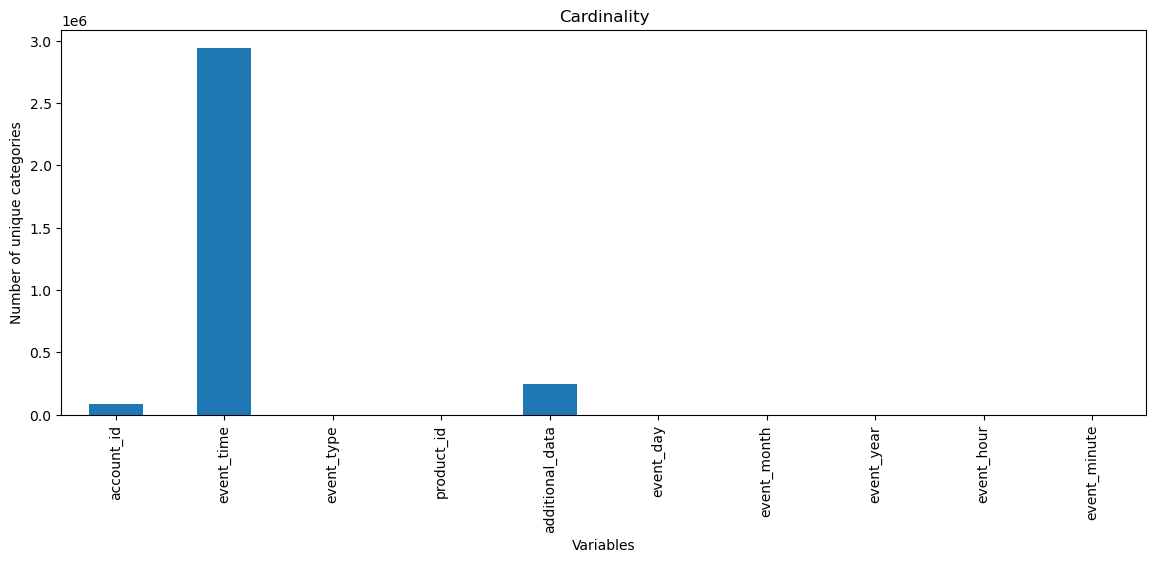

In [27]:
#Let's make a plot with the cardinality of each variable:
data.nunique().plot.bar(figsize=(14,5))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
#Cnclusion: from the plot, event time column has the highest unique catergories in the dataset

In [28]:
#Calling the unique value of event type
data['event_type'].unique()

array(['DashboardLivebookLinkOpened', 'ReadingOwnedBook',
       'ProductTocLivebookLinkOpened', 'ReadingOpenChapter',
       'HighlightCreated', 'BookmarkCreated', 'ReadingFreePreview',
       'ProductLookInsideLivebookLinkOpened', 'SearchResultOpened',
       'SearchMade', 'ProductLiveaudioUpsell', 'WishlistItemAdded',
       'OrderConfirmationLivebookLinkOpened', 'CrossReferenceTermOpened',
       'ExerciseSolved', 'UpvoteGiven', 'ShareableLinkOpened',
       'ShareableLinkCreated', 'NoteCreated', 'ProductSeeFreeLinkOpened',
       'LivebookLogin', 'EBookDownloaded', 'EBookRegistration',
       'FreeContentCheckout', 'UnknownOriginLivebookLinkOpened',
       'AddProductOffering', 'RemoveProductOffering', 'AddOrUpdateCoupon',
       'GoToManningShoppingCart', 'FirstManningAccess',
       'FirstLivebookAccess', 'LivebookRegistration',
       'LivebookAccountConfirmation', 'SherlockHolmesClueFound',
       'CommentCreated'], dtype=object)

In [29]:
#Checking the information of event type
data['event_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3242076 entries, 0 to 3242075
Series name: event_type
Non-Null Count    Dtype 
--------------    ----- 
3242076 non-null  object
dtypes: object(1)
memory usage: 24.7+ MB


In [30]:
data['event_type'].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

Text(0.5, 1.0, 'Cardinality')

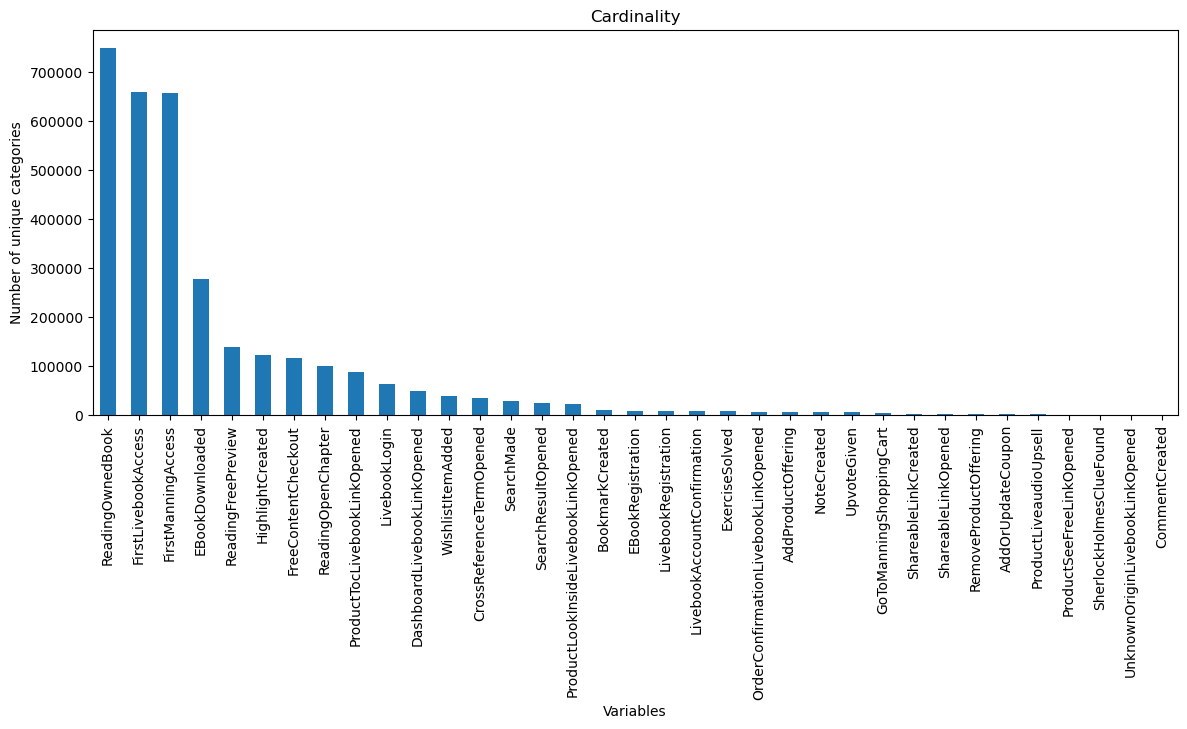

In [31]:
#Let's make a plot with the cardinality of each variable in event type:
data['event_type'].value_counts().plot.bar(figsize=(14,5))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
#conclusion: Unique categories are high in variable "ReadingOwnedBook"
#and very low from "ProductSeeFreeLinkOpened" to "CommentCreated" variables  

In [32]:
#Identifying rare categories, calling the event type
data['event_type'].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

In [33]:
#Assigning label freg to variable event type value counts
lable_freq = data['event_type'].value_counts()

In [34]:
#Next is to calculate the number of event per category of the event type variable and 
#then divide them by the total number of event in the dataset to obtain the percentage of each event type per category. 
#Then, I'll print the result:

#Percentage of event per category is expressed as decimals:

label_freq = data['event_type'].value_counts() / len(data)
label_freq

ReadingOwnedBook                       2.307966e-01
FirstLivebookAccess                    2.030261e-01
FirstManningAccess                     2.027528e-01
EBookDownloaded                        8.554889e-02
ReadingFreePreview                     4.262608e-02
HighlightCreated                       3.752010e-02
FreeContentCheckout                    3.583599e-02
ReadingOpenChapter                     3.084567e-02
ProductTocLivebookLinkOpened           2.718320e-02
LivebookLogin                          1.927284e-02
DashboardLivebookLinkOpened            1.490033e-02
WishlistItemAdded                      1.160028e-02
CrossReferenceTermOpened               1.051610e-02
SearchMade                             8.593568e-03
SearchResultOpened                     7.472990e-03
ProductLookInsideLivebookLinkOpened    7.090210e-03
BookmarkCreated                        3.362043e-03
EBookRegistration                      2.727265e-03
LivebookRegistration                   2.375638e-03
LivebookAcco

Text(0.5, 1.0, 'Identifying Rare Categories')

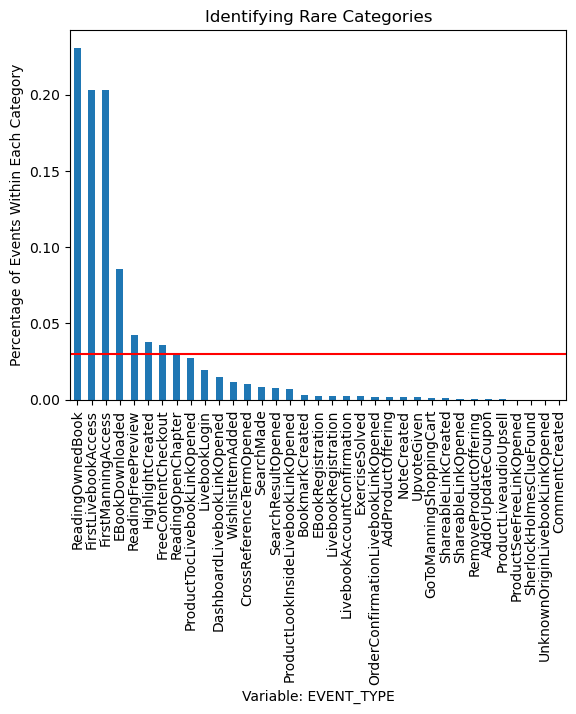

In [35]:
#I am making a bar plot showing the frequency of each category 
#and highlighting the 3% mark with a red line:

fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('Percentage of Events Within Each Category')
fig.set_xlabel('Variable: EVENT_TYPE')
fig.set_title('Identifying Rare Categories')
#conclusion: From the plot, variable "reading open chapter" to variable "comment created" categories
#are present in less than 3% of event type, as indicated by the red line in the preceding plot. 
#the horizontal red line is added at the height of 0.03 to indicate the 3% percentage limit,
#under which we considered a  category  as rare.

In [36]:
#Identifying outliers in the data set
#Assigning a function to create outliers
def find_outliers_boundaries(data):
    """
    finds the lower and upper boundaries for outliers in a dataset using the interquartile range
    
    Args:
    data(array-like): The dataset for which to find the outlier boundaries.
    
    Returns:
    A tuple of the lower and upper boundaries for outliers.
    """
    q1,q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return lower_bound,upper_bound

In [37]:
find_outliers_boundaries(data['product_id'])

(-1459.0, 2429.0)

In [38]:
find_outliers_boundaries(data['event_day'])

(-13.5, 46.5)

In [39]:
find_outliers_boundaries(data['event_hour'])

(numpy.datetime64('1969-12-31T23:59:59.999999992'),
 numpy.datetime64('1970-01-01T00:00:00.000000032'))

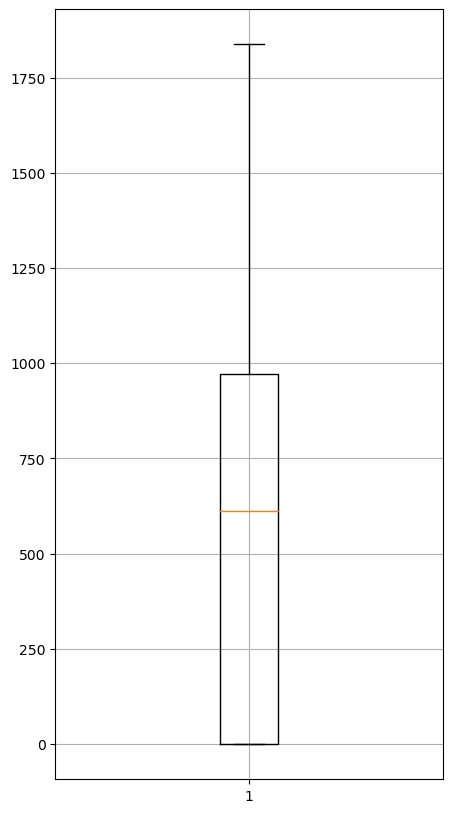

In [40]:
#plotting the outlier for each column
plt.figure(figsize=(5,10))
plt.boxplot(data['product_id'])
plt.grid()

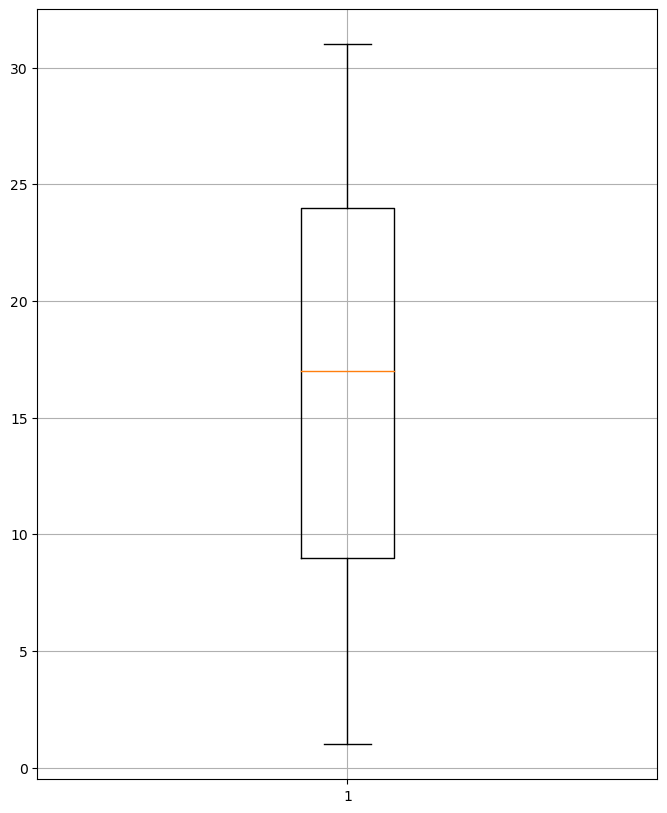

In [41]:
plt.figure(figsize=(8,10))
plt.boxplot(data['event_day'])
plt.grid()

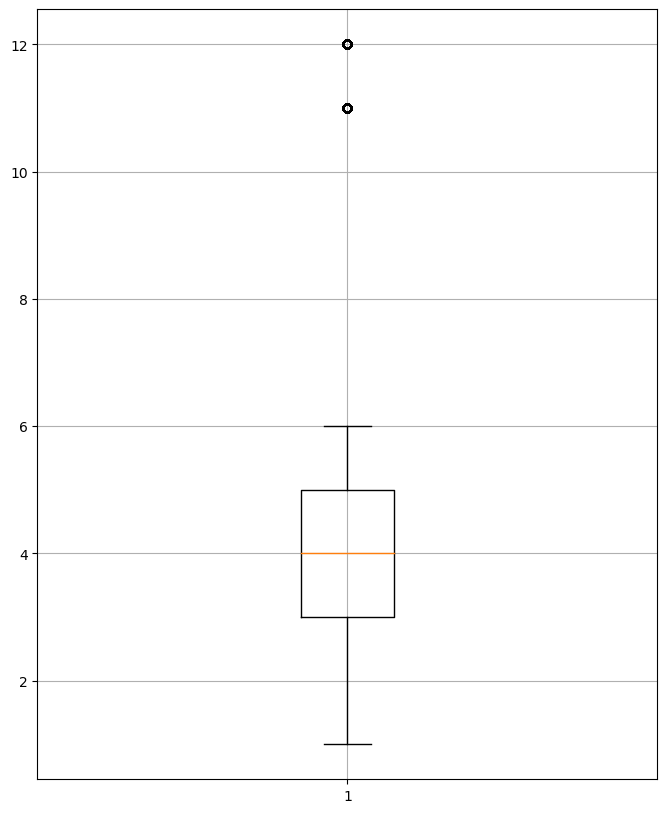

In [42]:
plt.figure(figsize=(8,10))
plt.boxplot(data['event_month'])
plt.grid()

Text(0.5, 1.0, 'Boxplot')

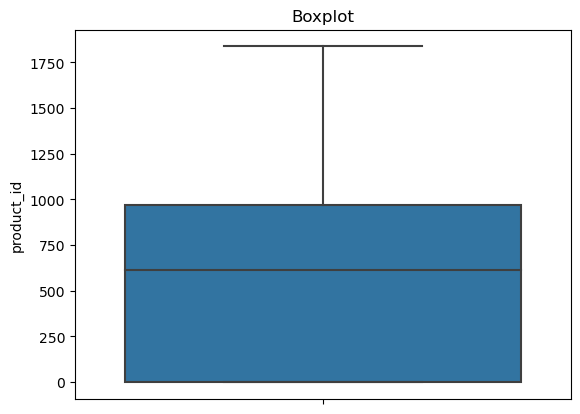

In [43]:
# To examine the Boxplot of the outlier, seaborn library has to imported
import seaborn as sns
sns.boxplot(y=data['product_id'])
plt.title('Boxplot')
#conclusion: showing outliers in product id

Text(0.5, 1.0, 'Boxplot')

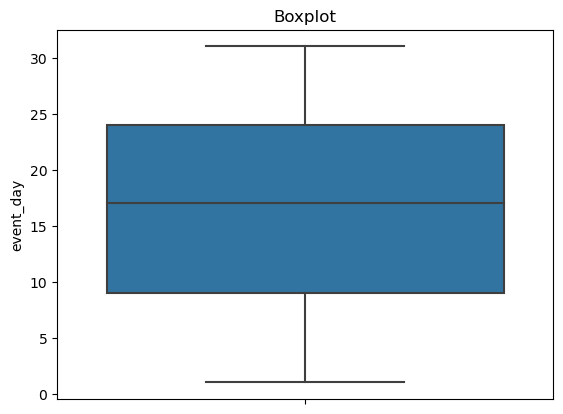

In [44]:
# To examine the Boxplot of the outlier, seaborn library has to imported
import seaborn as sns
sns.boxplot(y=data['event_day'])
plt.title('Boxplot')
#conclusion: showing outliers in the event day

Text(0.5, 1.0, 'Boxplot')

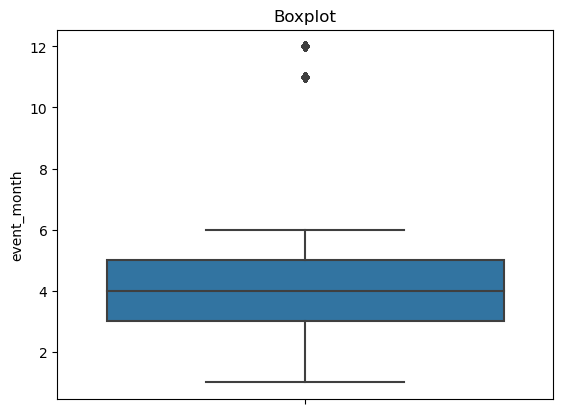

In [45]:
# To examine the Boxplot of the outlier, seaborn library has to imported
import seaborn as sns
sns.boxplot(y=data['event_month'])
plt.title('Boxplot')
#conclusion: showing outliers in the event month

##             EXPLORATORY DATA ANALYSIS(EDA)

In [46]:
#CREATING ADDITONAL COLUMNS(DAYS OF EVENT AND PERIOD OF DAY)
#Create a new column showing the days of the event
data['event_days'] = data['event_time'].dt.day_name()
data['event_hour'] = data['event_time'].dt.hour

diff_time = [data['event_hour'] < 6, data['event_hour'] < 12, data['event_hour'] < 18]
period = ['early morning', 'morning', 'afternoon']
data['event_period'] = np.select(diff_time, period, default='evening')

In [47]:
data.head()

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon


In [48]:
# Identifying how platform is used in the day.
gra_day_data = data.groupby(['event_type', 'event_day', 'event_hour', 'event_period'])['account_id'].size().reset_index()

In [49]:
#Checking for head of the new data set created of how platform is been used
gra_day_data.head()
#conclusion: from the first few rows, the highest account id that engage the platform is 5,
#in the early morning of the day btw the hour of 1am on the first day of the month.

,event_type,event_day,event_hour,event_period,account_id
0,AddOrUpdateCoupon,1,0,early morning,1
1,AddOrUpdateCoupon,1,1,early morning,5
2,AddOrUpdateCoupon,1,3,early morning,1
3,AddOrUpdateCoupon,1,4,early morning,2
4,AddOrUpdateCoupon,1,5,early morning,2


In [50]:
#Checking for tail of the new data set created of how platform is been used in the day
gra_day_data.tail()
#conclusion: from the last few rows, the highest account id that engage the platform is 64,
#in the evening of the day btw the hour of 8pm on the last day of the month.

,event_type,event_day,event_hour,event_period,account_id
21824,WishlistItemAdded,31,19,evening,39
21825,WishlistItemAdded,31,20,evening,64
21826,WishlistItemAdded,31,21,evening,51
21827,WishlistItemAdded,31,22,evening,63
21828,WishlistItemAdded,31,23,evening,35


In [51]:
#Checking for day that has the highest engagement using their account id.
tun_day_data = data.groupby(['event_day'])['account_id'].size().reset_index()

In [52]:
#Calling for the data set
tun_day_data
#from the table, day 19 has the highest no of engagement by the users and is shown in the plot

,event_day,account_id
0,1,112314
1,2,114658
2,3,107324
3,4,86782
4,5,88317
5,6,104777
6,7,96840
7,8,88381
8,9,91927
9,10,93687


In [53]:
#Setting event day as index
tun_day_data = tun_day_data.set_index('event_day')

In [54]:
tun_day_data

,account_id
event_day,
1,112314
2,114658
3,107324
4,86782
5,88317
6,104777
7,96840
8,88381
9,91927


Text(0.5, 1.0, 'CHECKING FOR THE DAY WITH HIGH ENGAGEMENT OF USER')

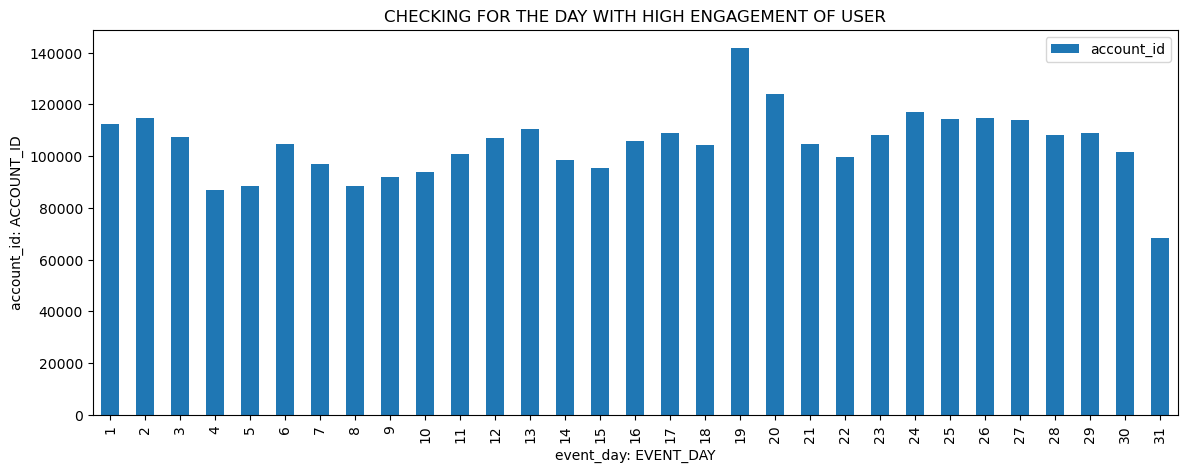

In [55]:
fig = tun_day_data.plot.bar(figsize=(14,5))
fig.set_ylabel('account_id: ACCOUNT_ID')
fig.set_xlabel('event_day: EVENT_DAY')
fig.set_title('CHECKING FOR THE DAY WITH HIGH ENGAGEMENT OF USER')
#conclusion: looking at the plot, day 19 had the highest day
#in which the user engage the service

In [56]:
#Checking for hour that has the highest engagement using their account id.
tunmi_day_data = data.groupby(['event_hour'])['account_id'].size().reset_index()

In [57]:
tunmi_day_data
#from the table the 14th hour of the day which is 2pm has the highest engagement
#this is also shown in the plot

,event_hour,account_id
0,0,124535
1,1,110457
2,2,107778
3,3,102092
4,4,97886
5,5,106103
6,6,116446
7,7,132807
8,8,136298
9,9,140293


Text(0.5, 1.0, 'CHECKING FOR THE HOUR WITH HIGH ENGAGEMENT OF USER')

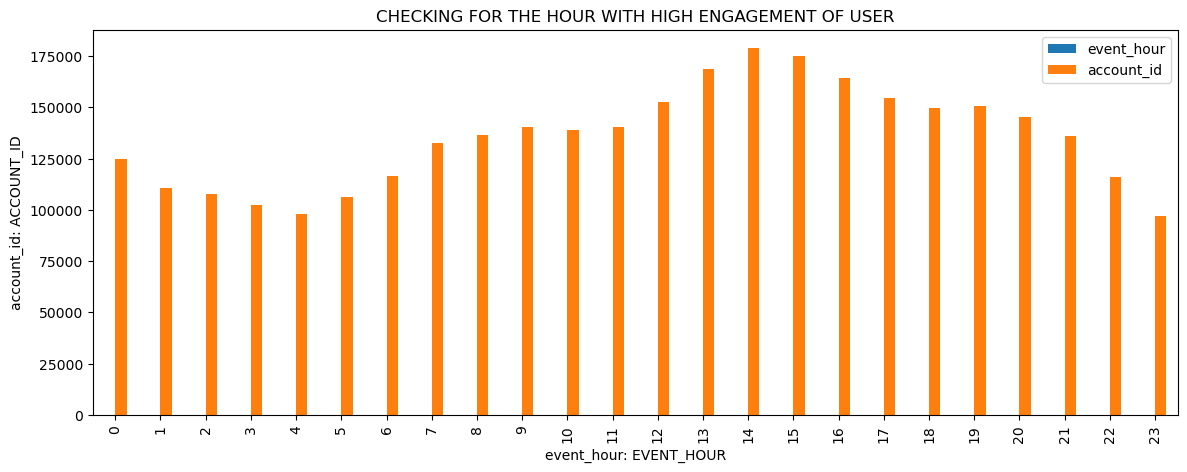

In [58]:
fig = tunmi_day_data.plot.bar(figsize=(14,5))
fig.set_ylabel('account_id: ACCOUNT_ID')
fig.set_xlabel('event_hour: EVENT_HOUR')
fig.set_title('CHECKING FOR THE HOUR WITH HIGH ENGAGEMENT OF USER')
#from the plot, hours btw 1pm and 3pm has the highest time the service is eagaged
#with 2pm in the afternoon topping the plot

In [59]:
#I want to use histogram to check for the freqency of how event occur by hour
#calling the data
data.head()

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon


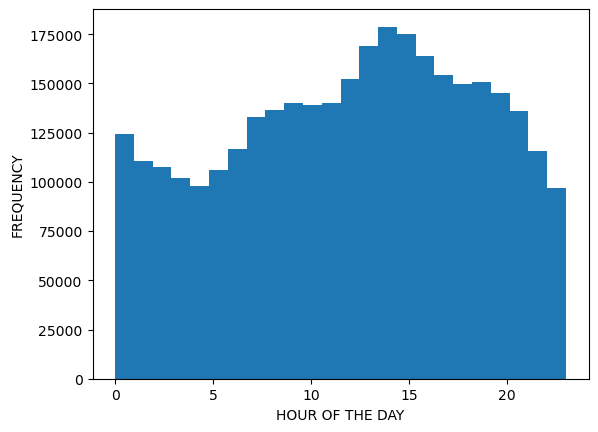

In [60]:
#Creating a histogram of event frequency by hour
plt.hist(data['event_hour'], bins=24)
plt.xlabel('HOUR OF THE DAY')
plt.ylabel('FREQUENCY')
plt.show()
#conclusion: from the plot, which there is peaks and valleys in the histogram
# this shows that there are patterns in which event occurs.

In [61]:
#Want to check to show another way in which event occur using event types and hour
pivot = data.pivot_table(index='event_type', columns='event_hour',
                         values='event_time', 
                         aggfunc='count')

In [62]:
pivot.head()

event_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
event_type,,,,,,,,,,,,,,,,,,,,,
AddOrUpdateCoupon,47.0,49.0,40.0,32.0,36.0,43.0,28.0,52.0,33.0,58.0,...,59.0,65.0,66.0,53.0,49.0,83.0,68.0,77.0,94.0,38.0
AddProductOffering,211.0,219.0,226.0,207.0,218.0,195.0,219.0,225.0,239.0,245.0,...,323.0,323.0,327.0,313.0,328.0,346.0,327.0,298.0,287.0,257.0
BookmarkCreated,377.0,408.0,346.0,360.0,373.0,440.0,472.0,511.0,450.0,514.0,...,567.0,533.0,519.0,559.0,458.0,492.0,432.0,509.0,360.0,313.0
CommentCreated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CrossReferenceTermOpened,1081.0,1044.0,1040.0,1079.0,958.0,1232.0,1180.0,1191.0,1391.0,1434.0,...,1747.0,1820.0,1800.0,1787.0,1670.0,1719.0,1630.0,1626.0,1375.0,916.0


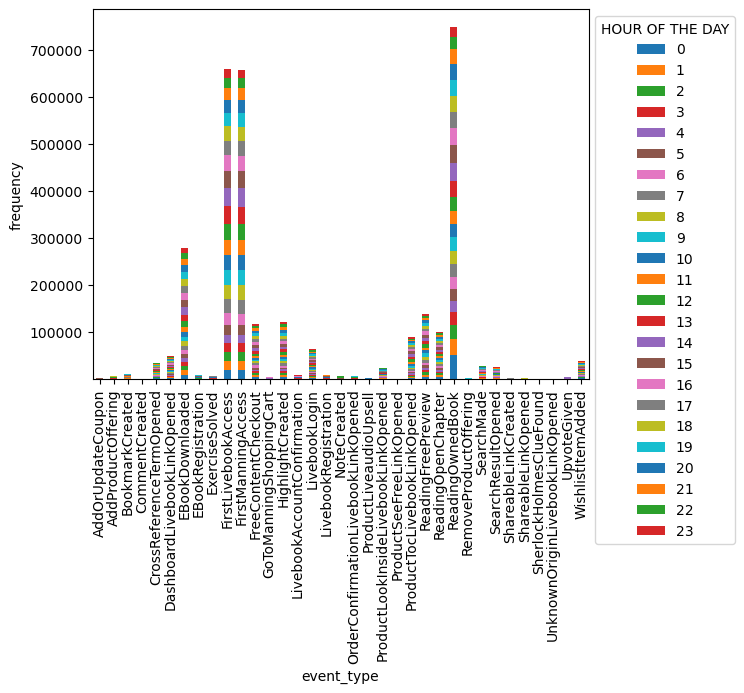

In [63]:
#Creating a bar chart of event frequency by event type and hour
pivot.plot(kind='bar', stacked=True)
plt.xlabel('event_type')
plt.ylabel('frequency')
plt.legend(title='HOUR OF THE DAY', bbox_to_anchor=(1,1))
plt.show()
#conclusion:this plot gives result of the freqency of different event types
#and how they change throughout the day, and from the plot, i could see there are
#certain event types that are frequently used at certain times of the day
#example is readingownedbook event types is most engaged at different times of the day,
#while firstlivebookaccess and firstmanningaccess
#have slightly same patterns compare to other event types

In [64]:
#Count the number OF EVENT TYPE IN THE  column
data['event_type'].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

In [65]:
#Creating a dataframe for event type
fwd_count = data['event_type'].value_counts()

In [66]:
#Framing the result and put in a dataframe
fwd_count = fwd_count.to_frame().reset_index()

In [67]:
fwd_count.columns = ["event_type","count"]

In [68]:
fwd_count

,event_type,count
0,ReadingOwnedBook,748260
1,FirstLivebookAccess,658226
2,FirstManningAccess,657340
3,EBookDownloaded,277356
4,ReadingFreePreview,138197
5,HighlightCreated,121643
6,FreeContentCheckout,116183
7,ReadingOpenChapter,100004
8,ProductTocLivebookLinkOpened,88130
9,LivebookLogin,62484


Text(0.5, 1.0, 'CHECKING FOR THE MOST ENGAGED EVENT TYPE')

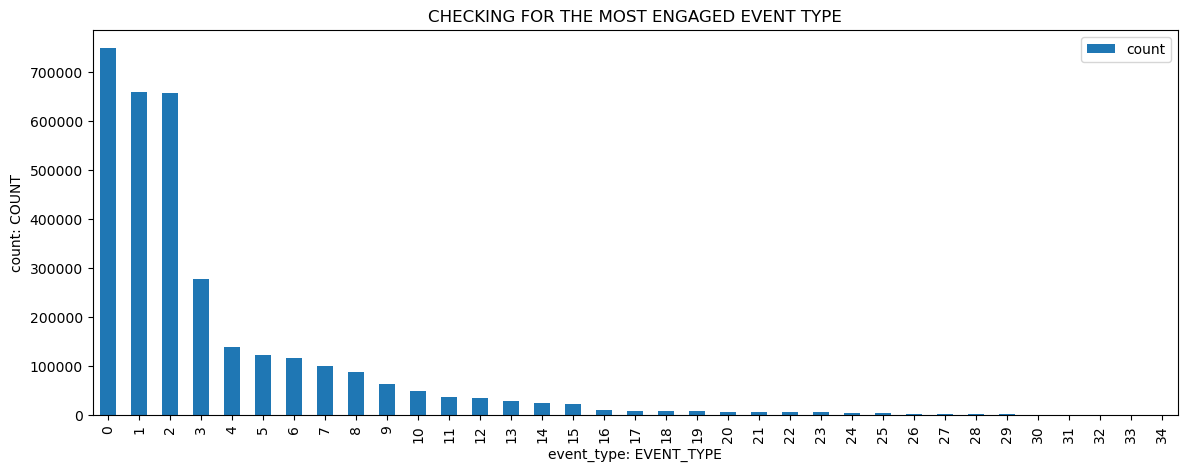

In [69]:
#Plotting a bar chart to see the most engaged event type
fig = fwd_count.plot.bar(figsize=(14,5))
fig.set_ylabel('count: COUNT')
fig.set_xlabel('event_type: EVENT_TYPE')
fig.set_title('CHECKING FOR THE MOST ENGAGED EVENT TYPE')
#conclusion: the plot shows the most engaged event which reading owned book

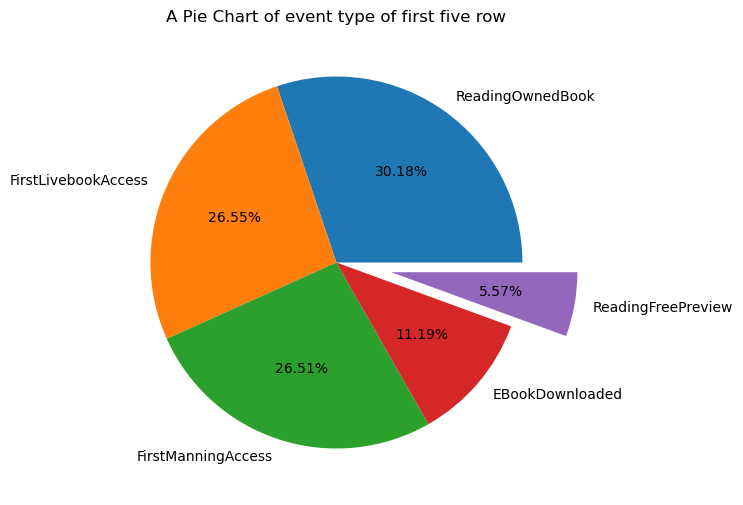

In [70]:
#Plotting a pie chart to show the first few rows of most engaged event types
plt.figure(figsize=(6,8))
plt.pie(fwd_count['count'][:5],labels=fwd_count['event_type'][:5], explode= [0.0,0.0,0.0,0.0,0.3], autopct='%1.2f%%')
plt.title("A Pie Chart of event type of first five row")
plt.show()
#conclusion: the pie chart show the first five rows 
#and reading owned book has the highest percentage of event that happens at different time of the day

In [71]:
data.head()

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon


In [72]:
#Creating a dataframe for event period
period_count = data['event_period'].value_counts()

In [73]:
period_count = period_count.to_frame().reset_index()

In [74]:
period_count.columns = ["event_period","count"]

In [75]:
period_count
#from the result, its shows most event type happens in the afternoon
#and different event happens differently at different times

,event_period,count
0,afternoon,993975
1,morning,805110
2,evening,794140
3,early morning,648851


Text(0.5, 1.0, 'CHECKING FOR THE MOST TIME EVENT IS ENGAGED')

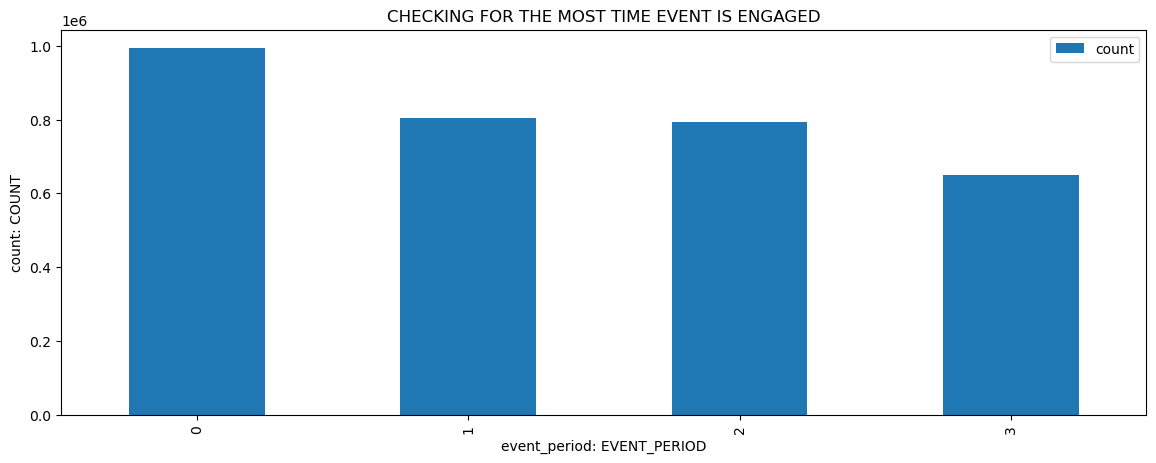

In [76]:
#Plotting a bar chart to see the most time event is engaed
fig = period_count.plot.bar(figsize=(14,5))
fig.set_ylabel('count: COUNT')
fig.set_xlabel('event_period: EVENT_PERIOD')
fig.set_title('CHECKING FOR THE MOST TIME EVENT IS ENGAGED')

In [77]:
#from the above charts: both bar and pie, 
#its shows that event happen at diiferent times of the day and also
#that, there are different partterns in which event happens
#the bar chart shows event mostly happen at different times
#in the afternoon on different event types
#and the bar chart also shows the highest event engaged. 
#the pie chart showing the first few rows of the dataset with the, 
#most engaged event types

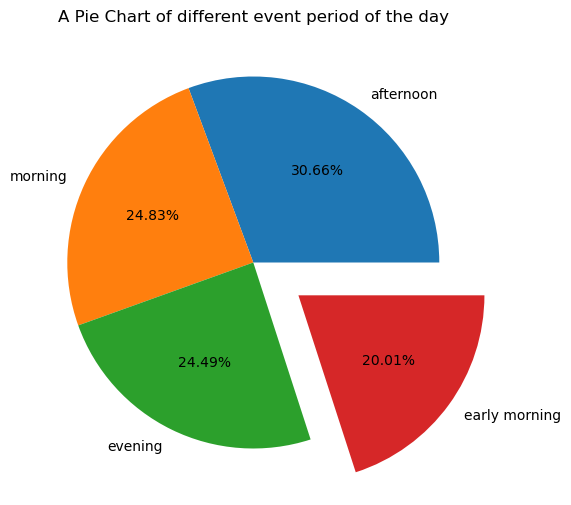

In [79]:
#Plotting a pie chart 
plt.figure(figsize=(6,8))
plt.pie(period_count['count'],labels=period_count['event_period'], explode= [0.0,0.0,0.0,0.3], autopct='%1.2f%%')
plt.title("A Pie Chart of different event period of the day")
plt.show()
#the pie chart sliced out shows the least time event is been engaged
#which is in the early hours of the morning and the afternoon been the highest
#from the visualzation shown.

In [80]:
#Creating a new dataframe for an account id on times of the day the service was used
account_data = data[data['account_id'] == "89f7601cb558e1c47b00a7fabb6a466c"]
account_data

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
20,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:16:03.552,ReadingOwnedBook,1073,1200s,29,11,2019,12,1970-01-01 00:00:00.000000016,Friday,afternoon
54043,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:32:51.241,ReadingOwnedBook,866,60s,6,12,2019,14,1970-01-01 00:00:00.000000032,Friday,afternoon
54077,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:36:53.372,ReadingOwnedBook,866,120s,6,12,2019,14,1970-01-01 00:00:00.000000036,Friday,afternoon
54109,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:40:24.222,ReadingOwnedBook,866,240s,6,12,2019,14,1970-01-01 00:00:00.000000040,Friday,afternoon
54251,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:57:31.000,ReadingOwnedBook,866,480s,6,12,2019,14,1970-01-01 00:00:00.000000057,Friday,afternoon
54508,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:26:16.836,ReadingOwnedBook,866,600s,6,12,2019,15,1970-01-01 00:00:00.000000026,Friday,afternoon
54524,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:28:16.803,ReadingOwnedBook,866,720s,6,12,2019,15,1970-01-01 00:00:00.000000028,Friday,afternoon
54577,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:33:17.430,ReadingOwnedBook,866,960s,6,12,2019,15,1970-01-01 00:00:00.000000033,Friday,afternoon
54639,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:38:18.165,ReadingOwnedBook,866,1200s,6,12,2019,15,1970-01-01 00:00:00.000000038,Friday,afternoon


In [81]:
#Analyzing event hour for the account picked
hour_count = account_data['event_hour']

In [82]:
hour_count

4        12
20       12
54043    14
54077    14
54109    14
54251    14
54508    15
54524    15
54577    15
54639    15
Name: event_hour, dtype: int64

Text(0.5, 1.0, 'Checking For Different Time of the day the account id picked engaged')

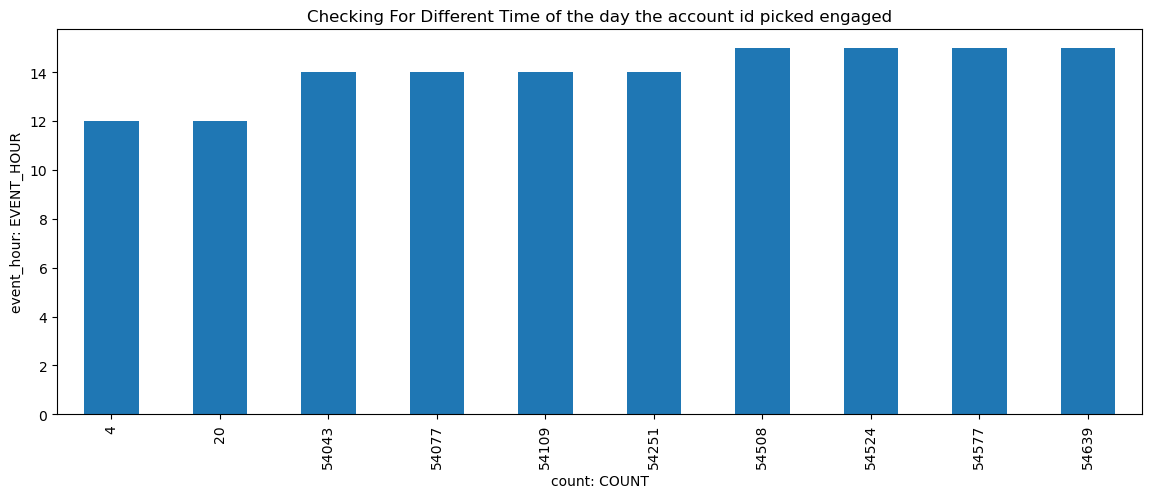

In [83]:
#Plotting a bar chart to see the different times the service was used by the account id
fig = hour_count.plot.bar(figsize=(14,5))
fig.set_ylabel('event_hour: EVENT_HOUR')
fig.set_xlabel('count: COUNT')
fig.set_title('Checking For Different Time of the day the account id picked engaged')
#conclusion: the user engage the account mostly in the afternoon
#with peak of usage between 2pm to 3pm and least usage by 12pm

In [84]:
#Calling the analyzed account id
account_data

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
20,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:16:03.552,ReadingOwnedBook,1073,1200s,29,11,2019,12,1970-01-01 00:00:00.000000016,Friday,afternoon
54043,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:32:51.241,ReadingOwnedBook,866,60s,6,12,2019,14,1970-01-01 00:00:00.000000032,Friday,afternoon
54077,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:36:53.372,ReadingOwnedBook,866,120s,6,12,2019,14,1970-01-01 00:00:00.000000036,Friday,afternoon
54109,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:40:24.222,ReadingOwnedBook,866,240s,6,12,2019,14,1970-01-01 00:00:00.000000040,Friday,afternoon
54251,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:57:31.000,ReadingOwnedBook,866,480s,6,12,2019,14,1970-01-01 00:00:00.000000057,Friday,afternoon
54508,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:26:16.836,ReadingOwnedBook,866,600s,6,12,2019,15,1970-01-01 00:00:00.000000026,Friday,afternoon
54524,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:28:16.803,ReadingOwnedBook,866,720s,6,12,2019,15,1970-01-01 00:00:00.000000028,Friday,afternoon
54577,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:33:17.430,ReadingOwnedBook,866,960s,6,12,2019,15,1970-01-01 00:00:00.000000033,Friday,afternoon
54639,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:38:18.165,ReadingOwnedBook,866,1200s,6,12,2019,15,1970-01-01 00:00:00.000000038,Friday,afternoon


In [85]:
#from the particular account analyzed "89f7601cb558e1c47b00a7fabb6a466c"
#the user engage the service 10times appearing at different rows, 
#uses the service mostly on fridays and 
#in the afternoon, btw the hours of 12pm, 2pm, and 3pm with 2pm and 3pm having the same range
#and the highest times as shown in the plot.
#the user engage event type "reading owned book" and all this happen in two days
#which the days are 29th november and 6th december in the year 2019.

In [86]:
#Checking the account id
#on the times of the day the service was used(how the service was used)
#and plotting on plot line to visualized
account_data = data[data['account_id'] == "89f7601cb558e1c47b00a7fabb6a466c"]
account_data

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
20,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:16:03.552,ReadingOwnedBook,1073,1200s,29,11,2019,12,1970-01-01 00:00:00.000000016,Friday,afternoon
54043,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:32:51.241,ReadingOwnedBook,866,60s,6,12,2019,14,1970-01-01 00:00:00.000000032,Friday,afternoon
54077,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:36:53.372,ReadingOwnedBook,866,120s,6,12,2019,14,1970-01-01 00:00:00.000000036,Friday,afternoon
54109,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:40:24.222,ReadingOwnedBook,866,240s,6,12,2019,14,1970-01-01 00:00:00.000000040,Friday,afternoon
54251,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 14:57:31.000,ReadingOwnedBook,866,480s,6,12,2019,14,1970-01-01 00:00:00.000000057,Friday,afternoon
54508,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:26:16.836,ReadingOwnedBook,866,600s,6,12,2019,15,1970-01-01 00:00:00.000000026,Friday,afternoon
54524,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:28:16.803,ReadingOwnedBook,866,720s,6,12,2019,15,1970-01-01 00:00:00.000000028,Friday,afternoon
54577,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:33:17.430,ReadingOwnedBook,866,960s,6,12,2019,15,1970-01-01 00:00:00.000000033,Friday,afternoon
54639,89f7601cb558e1c47b00a7fabb6a466c,2019-12-06 15:38:18.165,ReadingOwnedBook,866,1200s,6,12,2019,15,1970-01-01 00:00:00.000000038,Friday,afternoon


In [87]:
usage_by_hour = account_data.groupby('event_hour')['event_type'].count()

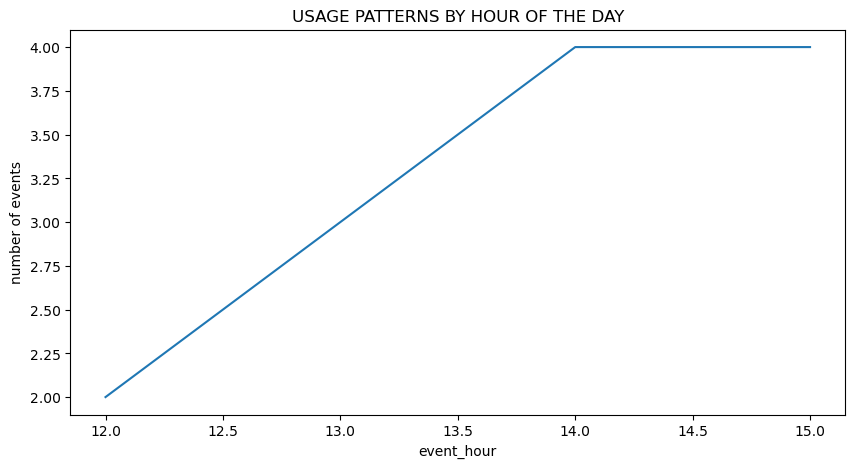

In [88]:
#visualization to show the usage of service patterns using a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=usage_by_hour.index, y=usage_by_hour.values)
plt.title('USAGE PATTERNS BY HOUR OF THE DAY')
plt.xlabel('event_hour')
plt.ylabel('number of events')
plt.show()
#the line plot visualizes the usage pattern of the service by the particular
#account picked for analysis using a line plot

In [89]:
#Creating a new dataframe for another account id,
#the account id in the question
#on the service was used during the day
account_data2 = data[data['account_id'] == "eaecfa7b11e62308832d07ac94dcda6a"]
account_data2

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,60s,29,11,2019,12,1970-01-01 00:00:00.000000012,Friday,afternoon
8,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:13:00.492,ReadingOwnedBook,887,120s,29,11,2019,12,1970-01-01 00:00:00.000000013,Friday,afternoon
15,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:15:00.768,ReadingOwnedBook,887,240s,29,11,2019,12,1970-01-01 00:00:00.000000015,Friday,afternoon
403,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 13:36:05.895,ReadingOwnedBook,887,480s,29,11,2019,13,1970-01-01 00:00:00.000000036,Friday,afternoon
1865,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:40:40.902,ReadingOwnedBook,887,600s,29,11,2019,19,1970-01-01 00:00:00.000000040,Friday,evening
1874,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:42:40.906,ReadingOwnedBook,887,720s,29,11,2019,19,1970-01-01 00:00:00.000000042,Friday,evening
1888,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:47:11.172,ReadingOwnedBook,887,960s,29,11,2019,19,1970-01-01 00:00:00.000000047,Friday,evening
1897,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 19:51:11.232,ReadingOwnedBook,887,1200s,29,11,2019,19,1970-01-01 00:00:00.000000051,Friday,evening
2975,eaecfa7b11e62308832d07ac94dcda6a,2019-11-30 00:09:18.351,ReadingOwnedBook,887,60s,30,11,2019,0,1970-01-01 00:00:00.000000009,Saturday,early morning
319970,eaecfa7b11e62308832d07ac94dcda6a,2020-01-02 13:34:52.613,EBookDownloaded,887,https://www.google.com/,2,1,2020,13,1970-01-01 00:00:00.000000034,Thursday,afternoon


In [90]:
#Analyzing event hour for the account picked
hour_count2 = account_data2['event_hour']

In [91]:
hour_count2

5         12
8         12
15        12
403       13
1865      19
1874      19
1888      19
1897      19
2975       0
319970    13
Name: event_hour, dtype: int64

Text(0.5, 1.0, 'Checking For Different Time of the day the account id2 picked engaged')

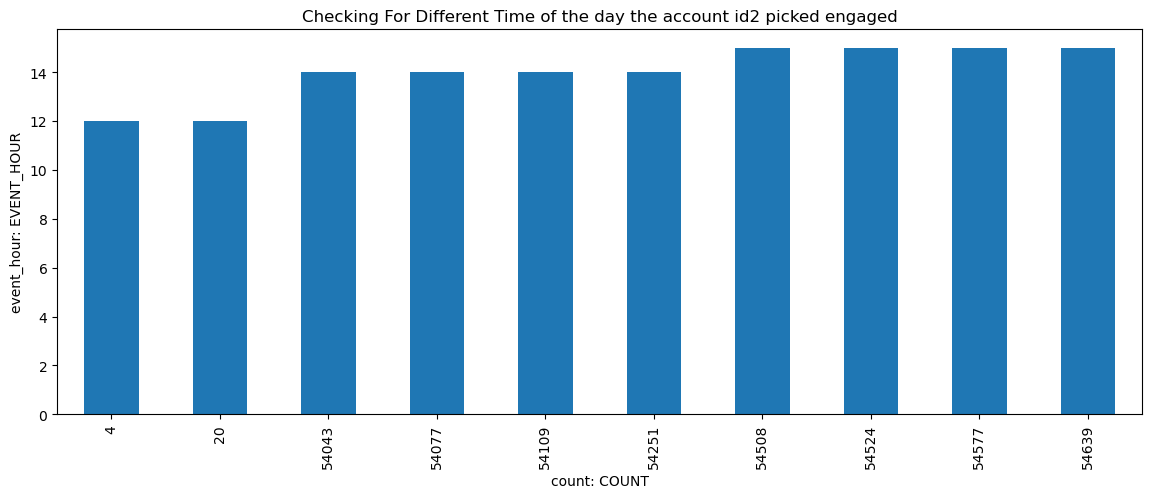

In [92]:
#Plotting a bar chart to see the different times the service was used
fig = hour_count.plot.bar(figsize=(14,5))
fig.set_ylabel('event_hour: EVENT_HOUR')
fig.set_xlabel('count: COUNT')
fig.set_title('Checking For Different Time of the day the account id2 picked engaged')
#conclusion: the user engage the account mostly in the evening
#with peak of usage mostly by 7pm and also in the afternoon btw 12pm and 1pm,
#and on a particular day was used in the early hour of the day

In [93]:
#checking the usage by the second account id using plot line

In [94]:
usage_by_hour2 = account_data.groupby('event_hour')['event_type'].count()

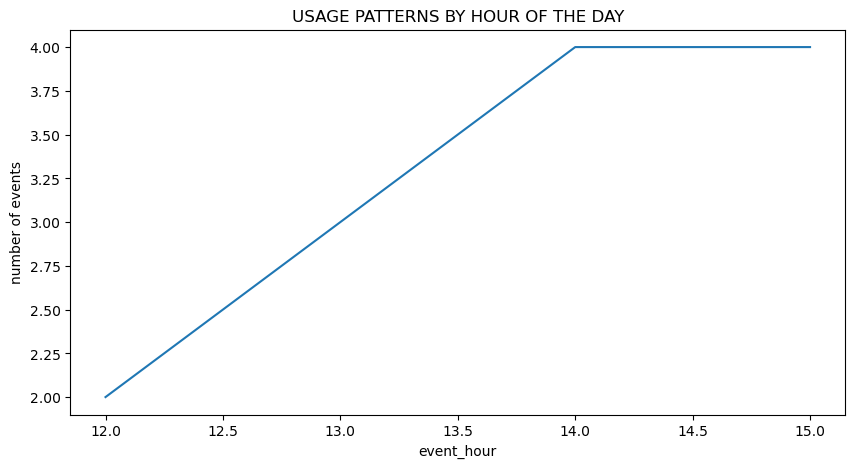

In [95]:
#visualization to show the usage of service patterns using a line plot
#by the account id
plt.figure(figsize=(10, 5))
sns.lineplot(x=usage_by_hour2.index, y=usage_by_hour2.values)
plt.title('USAGE PATTERNS BY HOUR OF THE DAY')
plt.xlabel('event_hour')
plt.ylabel('number of events')
plt.show()
#the line plot visualizes the usage pattern of the service by the particular
#account picked for analysis using a line plot and the parttern of this particular
#account id is diffrent from the previous account analyzed.

In [96]:
#from the account id giving in the question "eaecfa7b11e62308832d07ac94dcda6a"
#the user engage the service 10times appearing at different rows just like the first account analyzsed, 
#uses the service mostly on fridays and 
#in the afternoon and evening time, 
#btw the hours of 00am, 12pm, 1pm, and 7pm with 7pm been the most times used
#and the highest times as shown in the plot.
#the user engage event type "reading owned book" most of the time and "EbookDownloaded" once
#and all this happen in three days of two months 
#which the days are 29th november, 30th november year 2019
#and 2nd december year 2020.

# Additional Exploratory Analysis

In [97]:
# Analyzing the event days 
#Count the event days
days_of_event = data['event_days'].value_counts()

In [98]:
#Framing the result and put in a dataframe
days_of_event = days_of_event.to_frame()
days_of_event

,event_days
Monday,511433
Tuesday,506717
Wednesday,500201
Thursday,487364
Friday,458720
Sunday,415440
Saturday,362201


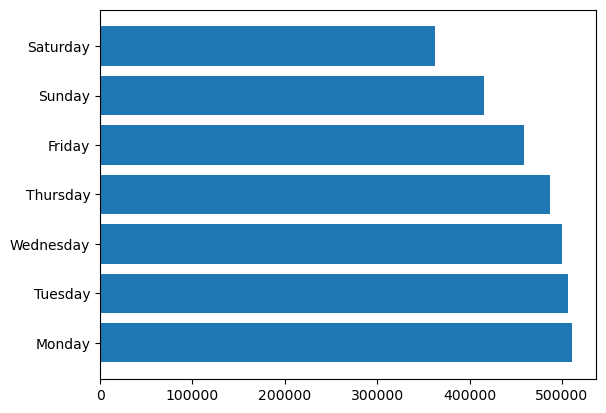

In [99]:
#Plot a bar chart fromt the result
x = days_of_event.index
y = days_of_event['event_days']

plt.barh(x,y)
plt.show()
#conclusion: monday topping the day in which the service was used most during the week

In [100]:
#Trying to show a relationship btw event type and product id
data_re = pd.crosstab(index=data['event_type'],
                     columns=data['product_id'])
data_re

product_id,-1,0,20,21,22,23,24,25,26,27,...,1354,1355,1358,1359,1364,1375,1385,1430,1439,1838
event_type,,,,,,,,,,,,,,,,,,,,,
AddOrUpdateCoupon,1277,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AddProductOffering,696,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookmarkCreated,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CommentCreated,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CrossReferenceTermOpened,0,0,0,0,29,0,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
DashboardLivebookLinkOpened,0,0,0,1,12,0,1,1,1,0,...,0,0,0,0,0,0,13,1,3,0
EBookDownloaded,0,0,21,32,218,6,3,37,8,4,...,0,0,0,0,0,0,101,28,15,0
EBookRegistration,0,0,0,0,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ExerciseSolved,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
#Here am sorting the index of the relationship.
data_re.sort_index(ascending=True)

product_id,-1,0,20,21,22,23,24,25,26,27,...,1354,1355,1358,1359,1364,1375,1385,1430,1439,1838
event_type,,,,,,,,,,,,,,,,,,,,,
AddOrUpdateCoupon,1277,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AddProductOffering,696,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookmarkCreated,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CommentCreated,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CrossReferenceTermOpened,0,0,0,0,29,0,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
DashboardLivebookLinkOpened,0,0,0,1,12,0,1,1,1,0,...,0,0,0,0,0,0,13,1,3,0
EBookDownloaded,0,0,21,32,218,6,3,37,8,4,...,0,0,0,0,0,0,101,28,15,0
EBookRegistration,0,0,0,0,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ExerciseSolved,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
#Checking for similarity of column product id and event type
data['product_id'].isin(data['event_type']).value_counts()
#conclusion: the result is showing false which means no similarity

False    3242076
Name: product_id, dtype: int64

In [103]:
#Checking the different account id and the number of event type in each id
data.groupby(by='account_id')['event_type'].value_counts()[:10]
#conclusion: the result shows diffrent number of id with different event type
#with reading owned book having the highest which is 13

account_id                        event_type         
00003e3b9e5336685200ae85d21b4f5e  EBookDownloaded         1
000163671e7b29522ad47604f3b48cca  FreeContentCheckout     2
                                  EBookDownloaded         1
00016ce8de4934b8fd5fd7e12f3cd0a9  ReadingFreePreview      2
                                  LivebookLogin           1
                                  ReadingOpenChapter      1
                                  SearchMade              1
000183d7295b5898359736f76320843f  FreeContentCheckout     1
0001b5d2fd33d5b98539d39658d69a90  ReadingOwnedBook       13
                                  FreeContentCheckout     2
Name: event_type, dtype: int64

In [104]:
#Lets check the different account id and the number event time each id use
data.groupby(by='account_id')['event_time'].value_counts()[:20]

account_id                        event_time             
00003e3b9e5336685200ae85d21b4f5e  2020-04-05 03:38:13.712    1
000163671e7b29522ad47604f3b48cca  2020-05-22 13:50:59.315    1
                                  2020-05-22 13:56:20.218    1
                                  2020-05-25 12:41:19.459    1
00016ce8de4934b8fd5fd7e12f3cd0a9  2019-12-04 02:52:13.557    1
                                  2020-02-21 14:35:59.688    1
                                  2020-02-21 14:37:18.139    1
                                  2020-02-21 14:38:29.872    1
                                  2020-02-21 14:39:22.136    1
000183d7295b5898359736f76320843f  2020-04-30 08:29:18.553    1
0001b5d2fd33d5b98539d39658d69a90  2020-03-13 02:04:47.011    2
                                  2019-12-13 21:56:03.578    1
                                  2019-12-13 21:57:03.584    1
                                  2019-12-13 21:59:03.603    1
                                  2019-12-13 22:03:03.661   

In [105]:
#Checking for duplicate account id and keeping false
data_ac_id=data['account_id'].duplicated(keep=False)
data_ac_id=data[data_ac_id]
data_ac_id.head()


,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon


In [106]:
#Checking for duplicate account id and keeping false
data_pro_id=data['product_id'].duplicated(keep=False)
data_pro_id=data[data_pro_id]
data_pro_id.head()


,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon


In [107]:
#Droping duplicate account ID rows
data_ac_id = data_ac_id.drop_duplicates(subset=['account_id'])
data_ac_id.head()

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
5,eaecfa7b11e62308832d07ac94dcda6a,2019-11-29 12:12:00.402,ReadingOwnedBook,887,60s,29,11,2019,12,1970-01-01 00:00:00.000000012,Friday,afternoon


In [108]:
data_ac_id.columns

Index(['account_id', 'event_time', 'event_type', 'product_id',
       'additional_data', 'event_day', 'event_month', 'event_year',
       'event_hour', 'event_minute', 'event_days', 'event_period'],
      dtype='object')

In [109]:
data_ac_id.shape

(73397, 12)

In [110]:
#Trying to analyse event hour and using plot line
hour=data.groupby('event_hour')['event_day'].count()

In [111]:
#Here i sort the index.
hour.sort_index(ascending=True)

event_hour
0     124535
1     110457
2     107778
3     102092
4      97886
5     106103
6     116446
7     132807
8     136298
9     140293
10    139052
11    140214
12    152400
13    168844
14    178815
15    175232
16    164146
17    154538
18    149507
19    150504
20    145356
21    135902
22    115755
23     97116
Name: event_day, dtype: int64

In [112]:
#Here i sort the index.
hour[10:20].sort_index(ascending=True)

event_hour
10    139052
11    140214
12    152400
13    168844
14    178815
15    175232
16    164146
17    154538
18    149507
19    150504
Name: event_day, dtype: int64

event_hour
10    139052
11    140214
18    149507
19    150504
12    152400
17    154538
16    164146
13    168844
15    175232
14    178815
Name: event_day, dtype: int64

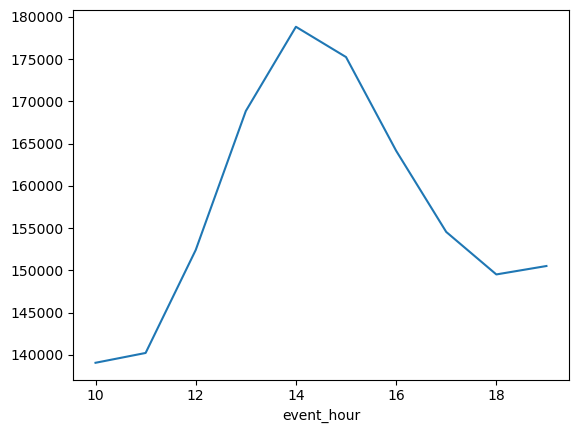

In [113]:
# Plot the event hours using plot line and show btw 10 to 20hrs in plot
hour=data.groupby('event_hour')['event_day'].count()[10:20]
hour.plot.line()
hour.sort_values(ascending=True)
#Conclusion:- 14th hour has maximum of event per day

event_hour
14    178815
15    175232
13    168844
16    164146
17    154538
12    152400
19    150504
18    149507
20    145356
9     140293
11    140214
10    139052
8     136298
21    135902
7     132807
0     124535
6     116446
22    115755
1     110457
2     107778
5     106103
3     102092
4      97886
23     97116
Name: event_day, dtype: int64

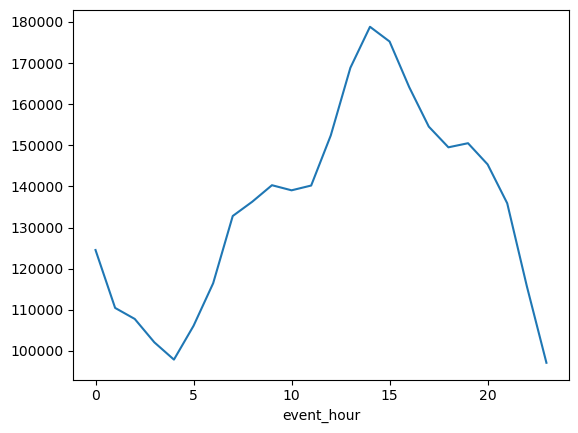

In [114]:
# Plot the orders by hours
hour=data.groupby('event_hour')['event_day'].count()
hour.plot.line()
hour.sort_values(ascending=False)
#Conclusion:- 14th hour has maximum of event per day and
#this also shows that event happens mostly in the afternoon
#with different pattens as it has been shown in bar plot also.

event_period
afternoon        993975
morning          805110
evening          794140
early morning    648851
Name: event_period, dtype: int64

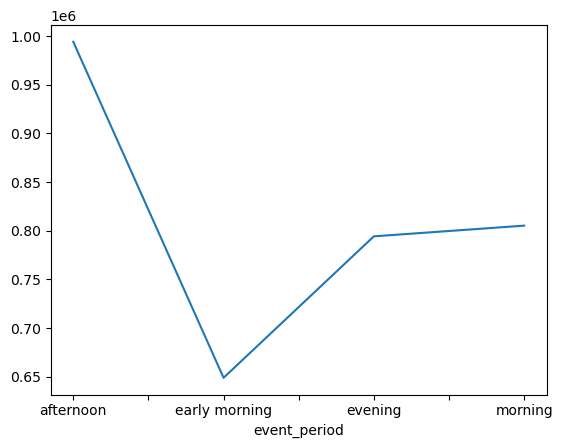

In [115]:
# Plot the event period using plot-line
period=data.groupby('event_period')['event_period'].count()
period.plot.line()
period.sort_values(ascending=False)
#Conclusion:- afternoon has the highest time of event engagement
#and early morning been the lowest, 
#this has been shown in the bar plot avove also

In [116]:
#Check the datatype of event period feature
data['event_period'].dtypes
#string datatype(object)


dtype('O')

In [117]:
#Saving the cleaned and analyze data in csv
data.to_csv("actions2load_cleansed.csv")

In [118]:
#Trying to read the saved data to be sure 
pd.read_csv(("actions2load_cleansed.csv"), index_col=0)

,account_id,event_time,event_type,product_id,additional_data,event_day,event_month,event_year,event_hour,event_minute,event_days,event_period
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,29,11,2019,12,1970-01-01 00:00:00.000000010,Friday,afternoon
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,29,11,2019,12,1970-01-01 00:00:00.000000011,Friday,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
3242071,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.485,FirstManningAccess,-1,https://www.manning.com/books/bdd-in-action-se...,4,6,2020,4,1970-01-01 00:00:00.000000019,Thursday,early morning
3242072,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:56.486,FirstLivebookAccess,-1,https://www.manning.com/books/bdd-in-action-se...,4,6,2020,4,1970-01-01 00:00:00.000000019,Thursday,early morning
3242073,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.613,FirstLivebookAccess,-1,https://www.google.com/,4,6,2020,4,1970-01-01 00:00:00.000000019,Thursday,early morning
3242074,6bb61e3b7bce0931da574d19d1d82c88,2020-06-04 04:19:59.612,FirstManningAccess,-1,https://www.google.com/,4,6,2020,4,1970-01-01 00:00:00.000000019,Thursday,early morning
